### Create two random variables statistically independent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

nsamples = 5000 # number of samples
x1       = 5*np.random.rand(nsamples) # random variable 1 
x2       = 100*np.random.rand(nsamples) # random variable 2 
X        = np.column_stack((x1,x2))
print(X)

[[ 0.14475135 94.96253432]
 [ 3.04355427 58.60475964]
 [ 1.89998628 94.02374289]
 ...
 [ 4.02535178 26.15251204]
 [ 0.57706596 80.36623299]
 [ 1.41831476 95.30269827]]


### Create a random variable y that depends on the random variables x1 and x2

In [2]:
Y      = np.sqrt(X[:,0]**2 + X[:,1]**2)
print(Y)

[94.96264464 58.68373773 94.04293794 ... 26.46048644 80.36830476
 95.31325151]


### Normalize all random variables in [0,1] to estimate y from (x1,x2) by using a neural network. Note that you must avoid normalization methods, such as z-score, which creates negative values 

In [3]:
x1_min = X[:,0].min()
x2_min = X[:,1].min()
x1_max = X[:,0].max()
x2_max = X[:,1].max()
y_min  = Y.min()
y_max  = Y.max()

X[:,0]   = (X[:,0]-x1_min)/(x1_max-x1_min)
X[:,1]   = (X[:,1]-x2_min)/(x2_max-x2_min)
Y        = (Y-y_min)/(y_max-y_min)

### Visualize the manifold y = f(x1,x2) for regression

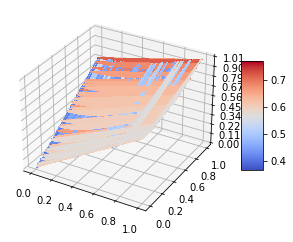

In [4]:
fig, ax  = plt.subplots(subplot_kw={"projection": "3d"})
Px1, Px2 = np.meshgrid(X[:,0], X[:,1])
Py       = np.sqrt(Px1**2 + Px2**2)
Py       = (Py - Py.min())/(Py.max()-Py.min())
surf     = ax.plot_surface(Px1, Px2, Py, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Create a neural network model for regression and train it

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Flatten(input_shape=[2]))
model.add(layers.Dense(100, name='dense1', activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer = optimizers.SGD(learning_rate=1e-3, momentum=0.9))
model.summary() 
history = model.fit(X,Y,epochs=100,batch_size=40)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
125/125 [==============================] - 0s 472us/step - loss: 0.0874
Epoch 2/100
125/125 [==============================] - 0s 444us/step - loss: 0.0815
Epoch 3/100
125/125 [==============================] - 0s 420us/step - loss: 0.0764
Epoch 4/100
125/125 [==============================] - 0s 403us/step - loss: 0.0717
Epoch 5/100
125/125 [=============================

125/125 [==============================] - 0s 394us/step - loss: 0.0012
Epoch 89/100
125/125 [==============================] - 0s 429us/step - loss: 0.0012
Epoch 90/100
125/125 [==============================] - 0s 419us/step - loss: 0.0012
Epoch 91/100
125/125 [==============================] - 0s 391us/step - loss: 0.0011
Epoch 92/100
125/125 [==============================] - 0s 385us/step - loss: 0.0011
Epoch 93/100
125/125 [==============================] - 0s 353us/step - loss: 0.0011
Epoch 94/100
125/125 [==============================] - 0s 357us/step - loss: 0.0011
Epoch 95/100
125/125 [==============================] - 0s 355us/step - loss: 0.0011
Epoch 96/100
125/125 [==============================] - 0s 380us/step - loss: 0.0011
Epoch 97/100
125/125 [==============================] - 0s 408us/step - loss: 0.0011
Epoch 98/100
125/125 [==============================] - 0s 430us/step - loss: 0.0010
Epoch 99/100
125/125 [==============================] - 0s 396us/step - loss: 

### Verify the results: the model should be able to estimate y given (x1,x2). 

In [7]:
x1 = 5*np.random.rand(1)[0] 
x2 = 100*np.random.rand(1)[0]
y  = (x1**2 + x2**2)**(1/2)
x1 = (x1 - x1_min) / (x1_max - x1_min)
x2 = (x2 - x2_min) / (x2_max - x2_min)
y_pred = model.predict([[x1,x2]])[0]*(y_max-y_min) + y_min 
print(y_pred, y, "squared error=", (y_pred-y)**2)

[47.33281] 47.468843851401026 squared error= [0.01850577]
